# Problem Statement

To predict the Customer value for a retail store based on different quantitative
and qualitative features provided.
The customer value is a profitability metric in terms of a value placed by the company on each
customer and can be conceived in two dimensions: the customer's present Value and potential
future Value.
A major retail store wants to evaluate customer lvalue in terms of high/medium/low based on each
customer’s demographics and purchase information/ sales transactions, to take optimal
marketing/promotional decisions and implement appropriate action plans .
You are expected to create an analytical and modelling framework to predict customer value of each
customer as High/Medium/Low based on the quantitative and qualitative features provided in the
dataset.

Importing some of the libraries

In [1]:
import numpy as np
import pandas as pd
#importing libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt


# Reading the data

In [2]:
train=pd.read_csv("Train-1546582083062.csv")

In [3]:
test=pd.read_csv("Test-1546582100445.csv")

In [4]:
traindemo=pd.read_csv("Train_Demographics-1546580051604.csv")

In [5]:
testdemo=pd.read_csv("Test_Demographics-1546580080647.csv")

In [6]:
traintransaction=pd.read_csv("Train_Transactions-1546579767306.csv")

In [7]:
testtransaction=pd.read_csv("Test_Transactions-1546579926795.csv")

In [8]:
train.head()

,CustomerId,CustomerValue
0,C22981,High
1,C28576,Low
2,C23809,Low
3,C29339,Low
4,C30598,Low


In [9]:
train.shape


(3315, 2)

In [10]:
traindemo.head()

,CustomerId,DOB,gender,MaritalStatus,Familysize
0,C21117,1985-06-14,M,Yes,4
1,C21118,1984-11-21,M,Yes,4
2,C21119,1999-02-01,M,Yes,2
3,C21121,1973-06-22,F,Yes,4
4,C21124,1966-01-02,M,Yes,3


In [11]:
traindemo.shape


(3315, 5)

# Merging the data

In [12]:
train=pd.merge(train,traindemo,how="left",on="CustomerId")

In [13]:
test=pd.merge(test,testdemo,how="left",on="CustomerId")

In [14]:
train.shape

(3315, 6)

In [15]:
test.shape

(940, 5)

In [16]:
traintransaction.head()

,BillDate,BillNumber,CustomerId,ProductID,Quantity,UnitPrice
0,2013-01-01 8:26,B12551,C25132,PR9338,6,2.55
1,2013-01-01 8:26,B12551,C25132,PR8754,6,3.39
2,2013-01-01 8:26,B12551,C25132,PR8953,8,2.75
3,2013-01-01 8:26,B12551,C25132,PR8905,6,3.39
4,2013-01-01 8:26,B12551,C25132,PR8904,6,3.39


In [17]:
train=pd.merge(train,traintransaction,how="left",on="CustomerId")

In [18]:
test=pd.merge(test,testtransaction,how="left",on="CustomerId")

In [19]:
train.shape

(320009, 11)

In [20]:
test.shape

(88319, 10)

In [21]:
train.drop_duplicates(subset="CustomerId",keep='last',inplace=True)

In [22]:
train.shape

(3315, 11)

In [23]:
test.drop_duplicates(subset="CustomerId",keep='last',inplace=True)

In [24]:
test.shape

(940, 10)

In [25]:
test_id=test.CustomerId

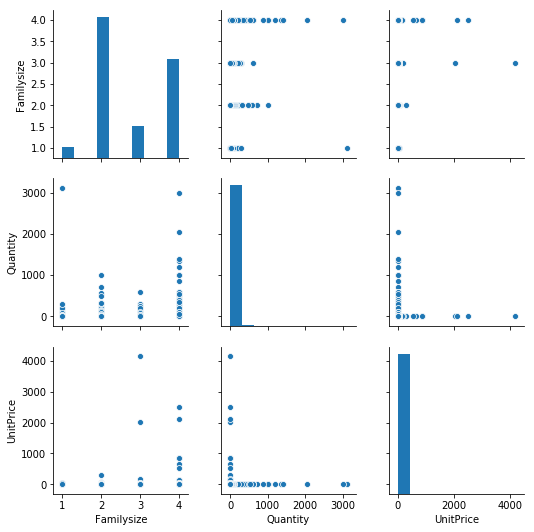

In [26]:
sns.pairplot(train)

Text(0.5, 1.0, 'correlation plot')

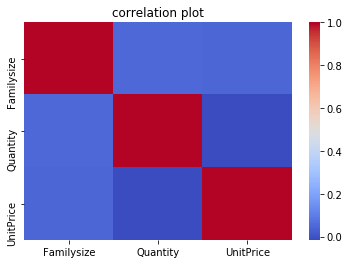

In [27]:
sns.heatmap(train.corr(),cmap='coolwarm')
plt.title('correlation plot')

In [28]:
train.head()

,CustomerId,CustomerValue,DOB,gender,MaritalStatus,Familysize,BillDate,BillNumber,ProductID,Quantity,UnitPrice
72,C22981,High,1990-11-17,F,Yes,4,2013-12-31 12:31,B30240,PR8143,10,2.08
125,C28576,Low,1991-08-21,F,Yes,3,2013-10-22 10:47,B61518,PR7909,7,2.10
153,C23809,Low,1999-12-22,F,Yes,2,2013-10-31 14:13,B27622,PR6967,1,1.25
163,C29339,Low,1996-03-10,M,Yes,2,2013-12-22 13:36,B71800,PR9203,13,1.25
209,C30598,Low,1996-09-19,F,Yes,2,2013-12-16 11:21,B82113,PR7399,5,12.75


Splitting DOB into day,month,year

In [29]:
train['DOB'] = pd.to_datetime(train['DOB'], errors='coerce')
train['YOB'] = train['DOB'].dt.year
train['MOB'] = train['DOB'].dt.month
train['DtOB'] = train['DOB'].dt.day
train.drop("DOB",axis=1,inplace=True)

In [30]:
test['DOB'] = pd.to_datetime(test['DOB'], errors='coerce')
test['YOB'] = test['DOB'].dt.year
test['MOB'] = test['DOB'].dt.month
test['DtOB'] = test['DOB'].dt.day
test.drop("DOB",axis=1,inplace=True)

In [31]:
train.head()

,CustomerId,CustomerValue,gender,MaritalStatus,Familysize,BillDate,BillNumber,ProductID,Quantity,UnitPrice,YOB,MOB,DtOB
72,C22981,High,F,Yes,4,2013-12-31 12:31,B30240,PR8143,10,2.08,1990,11,17
125,C28576,Low,F,Yes,3,2013-10-22 10:47,B61518,PR7909,7,2.10,1991,8,21
153,C23809,Low,F,Yes,2,2013-10-31 14:13,B27622,PR6967,1,1.25,1999,12,22
163,C29339,Low,M,Yes,2,2013-12-22 13:36,B71800,PR9203,13,1.25,1996,3,10
209,C30598,Low,F,Yes,2,2013-12-16 11:21,B82113,PR7399,5,12.75,1996,9,19


Dropping unwanted columns

In [32]:
droplist=["CustomerId","BillNumber",'ProductID',"BillDate"]
train.drop(droplist,axis=1,inplace=True)

In [33]:
test.drop(droplist,axis=1,inplace=True)

In [34]:
train.head()

,CustomerValue,gender,MaritalStatus,Familysize,Quantity,UnitPrice,YOB,MOB,DtOB
72,High,F,Yes,4,10,2.08,1990,11,17
125,Low,F,Yes,3,7,2.10,1991,8,21
153,Low,F,Yes,2,1,1.25,1999,12,22
163,Low,M,Yes,2,13,1.25,1996,3,10
209,Low,F,Yes,2,5,12.75,1996,9,19


Encoding the categorical values

In [35]:
categ=["CustomerValue","gender","MaritalStatus"]

In [36]:
import collections
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Encode Categorical Data

for ft in categ:
    le = LabelEncoder()
    train[ft] = le.fit_transform(train[ft])

In [37]:
train.head()

,CustomerValue,gender,MaritalStatus,Familysize,Quantity,UnitPrice,YOB,MOB,DtOB
72,0,0,1,4,10,2.08,1990,11,17
125,1,0,1,3,7,2.10,1991,8,21
153,1,0,1,2,1,1.25,1999,12,22
163,1,1,1,2,13,1.25,1996,3,10
209,1,0,1,2,5,12.75,1996,9,19


In [38]:
categ2=["gender","MaritalStatus"]

In [39]:
for ft in categ2:
    le = LabelEncoder()
    test[ft] = le.fit_transform(test[ft])

# Train Test Split

In [40]:
from sklearn.model_selection import train_test_split

Y = train['CustomerValue']
X = train.drop('CustomerValue', axis=1)

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.33, random_state=10)

# Algorithm 1: Gradient Boosting

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

gbmodel = GradientBoostingClassifier(n_estimators= 200, max_depth= 7)
gbmodel.fit(X_train,Y_train)

val_predict =gbmodel.predict(X_test)

accu = accuracy_score(Y_test,val_predict)
print(accu)

0.6224862888482633


In [43]:
prediction=gbmodel.predict(test)

In [44]:
prediction

array([2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 0,
       2, 2, 2, 0, 2, 2, 1, 1, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 1, 1, 0, 0,
       2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 0, 0, 2, 2, 0, 0, 2, 1, 0, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 1, 0, 2, 1, 0, 1, 2,
       2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 1, 0, 0, 2, 0, 0, 2, 2, 2,
       0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 1, 0, 2, 0, 0, 1, 2, 0, 2, 1, 0, 1,
       1, 2, 1, 2, 0, 0, 1, 0, 0, 2, 1, 2, 2, 0, 1, 0, 1, 0, 2, 1, 2, 0,
       2, 0, 2, 1, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 1, 1, 2,
       0, 2, 2, 2, 1, 1, 1, 2, 2, 0, 2, 0, 2, 2, 1, 1, 0, 1, 2, 1, 0, 0,
       0, 2, 1, 2, 1, 2, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 2, 0,
       1, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 2, 2, 1, 2, 0, 1, 0, 2, 0, 1,
       0, 0, 1, 0, 1, 2, 1, 1, 1, 2, 1, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0,
       1, 2, 2, 1, 2, 0, 2, 0, 1, 0, 1, 2, 0, 1, 1,

In [45]:
i=0
pred = []
for arr in prediction:
    if prediction[i]==0:
        pred.append('High')
    elif prediction[i]== 1:
        pred.append('Low')
    elif prediction[i] == 2:
        pred.append("Medium")
    i = i+1

In [46]:
pred

['Medium',
 'High',
 'Medium',
 'High',
 'Medium',
 'Medium',
 'High',
 'High',
 'Medium',
 'Medium',
 'Medium',
 'Medium',
 'Medium',
 'High',
 'Medium',
 'Medium',
 'Medium',
 'High',
 'High',
 'High',
 'High',
 'High',
 'Medium',
 'Medium',
 'Medium',
 'High',
 'High',
 'High',
 'High',
 'High',
 'Medium',
 'Medium',
 'Medium',
 'Medium',
 'Medium',
 'Medium',
 'High',
 'Medium',
 'High',
 'High',
 'High',
 'Medium',
 'Medium',
 'High',
 'Medium',
 'Medium',
 'Medium',
 'High',
 'Medium',
 'Medium',
 'Low',
 'Low',
 'High',
 'Medium',
 'Medium',
 'High',
 'Medium',
 'Medium',
 'High',
 'High',
 'High',
 'High',
 'Low',
 'Low',
 'High',
 'High',
 'Medium',
 'Medium',
 'High',
 'High',
 'Medium',
 'High',
 'Medium',
 'Low',
 'Medium',
 'Medium',
 'High',
 'High',
 'Medium',
 'Medium',
 'High',
 'High',
 'Medium',
 'Low',
 'High',
 'Medium',
 'Medium',
 'Medium',
 'High',
 'Medium',
 'Medium',
 'Medium',
 'Medium',
 'Medium',
 'High',
 'High',
 'Medium',
 'High',
 'Medium',
 'Medium',


In [47]:
submission = pd.DataFrame(pred,index =test_id)
submission.columns = ["CustomerValue"]

In [48]:
submission.to_csv('suryaj.csv')

In [49]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

# Algorithm 2 : XGBoost

In [50]:
param_test1 = {
'max_depth':[6,7,8],
 'min_child_weight':[1,2]
   # 'min_child_weight':[6,8,10,12]
   # 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=7,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'multi:softprob', nthread=4, num_class=3,scale_pos_weight=1, seed=27), 
 param_grid = param_test1,n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train,Y_train)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

/Users/surya/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/surya/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/surya/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/surya/anaconda3/lib/pyth

({'mean_fit_time': array([1.41000581, 1.2981782 , 1.50453911, 1.48786564, 1.7250144 ,
         1.45697083]),
  'std_fit_time': array([0.05732445, 0.00622906, 0.01494753, 0.01278084, 0.00867713,
         0.29373487]),
  'mean_score_time': array([0.02918401, 0.02537498, 0.02949772, 0.02825065, 0.03436279,
         0.02971373]),
  'std_score_time': array([0.00343135, 0.00207757, 0.00038263, 0.00098029, 0.00210508,
         0.00226298]),
  'param_max_depth': masked_array(data=[6, 6, 7, 7, 8, 8],
               mask=[False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'param_min_child_weight': masked_array(data=[1, 2, 1, 2, 1, 2],
               mask=[False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'max_depth': 6, 'min_child_weight': 1},
   {'max_depth': 6, 'min_child_weight': 2},
   {'max_depth': 7, 'min_child_weight': 1},
   {'max_depth': 7, 'min_child_weight': 2},
   {'max_depth'

In [51]:
xgb1 = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=6,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'multi:softprob', nthread=4, num_class=3,scale_pos_weight=1, seed=27)

In [52]:
#Fit the algorithm on the data
xgb1.fit(X_train, Y_train,eval_metric='auc')

#Predict training set:
dtrain_predictions = xgb1.predict(X_test)
dtrain_predprob = xgb1.predict_proba(X_test)[:,1]

#Print model report:
print ("\nModel Report")
print ("Accuracy : %.4g"% accuracy_score(Y_test, dtrain_predictions))


Model Report
Accuracy : 0.6188


In [53]:
xgb2 = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=6,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'multi:softprob', nthread=4, num_class=3,scale_pos_weight=1, seed=27)

In [54]:
#Fit the algorithm on the data
xgb2.fit(X_train, Y_train,eval_metric='auc')

#Predict training set:
dtrain_predictions = xgb1.predict(X_test)
dtrain_predprob = xgb1.predict_proba(X_test)[:,1]

#Print model report:
print ("\nModel Report")
print ("Accuracy : %.4g"% accuracy_score(Y_test, dtrain_predictions))


Model Report
Accuracy : 0.6188


In [55]:
xgb3 = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=8,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'multi:softprob', nthread=4, num_class=3,scale_pos_weight=1, seed=27)

In [56]:
xgb3.fit(X_train, Y_train,eval_metric='auc')

#Predict training set:
dtrain_predictions = xgb1.predict(X_test)
dtrain_predprob = xgb1.predict_proba(X_test)[:,1]

#Print model report:
print ("\nModel Report")
print ("Accuracy : %.4g"% accuracy_score(Y_test, dtrain_predictions))


Model Report
Accuracy : 0.6188


In [57]:
predictionJ=xgb3.predict(test)

In [58]:
predictionJ

array([0, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0,
       2, 2, 0, 1, 2, 2, 0, 1, 2, 2, 2, 0, 2, 0, 0, 0, 2, 0, 1, 1, 0, 2,
       2, 2, 0, 0, 2, 0, 2, 1, 2, 0, 0, 0, 2, 2, 0, 2, 2, 1, 0, 2, 2, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 1, 2, 2, 1, 0, 1, 2,
       1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 1, 0, 0, 2, 0, 0, 2, 2, 2,
       0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 1, 0, 1, 0, 0, 1, 2, 0, 2, 1, 2, 1,
       2, 2, 2, 2, 0, 0, 1, 0, 0, 2, 1, 2, 2, 0, 1, 0, 1, 0, 2, 2, 2, 0,
       2, 2, 2, 1, 2, 0, 0, 1, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 1, 1, 0,
       0, 0, 2, 1, 1, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 1, 0, 0, 2, 1, 0, 0,
       0, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 2, 0, 0, 2, 0,
       1, 1, 0, 2, 2, 0, 1, 2, 0, 2, 2, 0, 2, 2, 1, 2, 2, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0,
       1, 2, 2, 2, 2, 0, 2, 0, 1, 0, 1, 1, 0, 1, 1,

In [59]:
i=0
pred = []
for arr in predictionJ:
    if predictionJ[i]==0:
        pred.append('High')
    elif predictionJ[i]== 1:
        pred.append('Low')
    elif predictionJ[i] == 2:
        pred.append("Medium")
    i = i+1

In [60]:
submission = pd.DataFrame(pred,index =test_id)
submission.columns = ["CustomerValue"]

In [61]:
submission.to_csv('taraj.csv')

# Algorithm 3 : Random Forest 

In [62]:
from sklearn.ensemble import RandomForestClassifier

model_rforest = RandomForestClassifier(n_estimators=20, random_state=0)

In [63]:
model_rforest.fit(X_train, Y_train)
Y_pred_rforest = model_rforest.predict(X_test)

In [64]:
print ("Accuracy Score:")
print(accuracy_score(Y_test, Y_pred_rforest))

Accuracy Score:
0.613345521023766


In [65]:
number_of_trees=735

In [66]:
model_rforest2 = RandomForestClassifier(n_estimators=number_of_trees, random_state=0)
model_rforest2.fit(X_train, Y_train)
Y_pred_rforest2 = model_rforest2.predict(X_test)


In [67]:
print ("Accuracy Score:")
print(accuracy_score(Y_test, Y_pred_rforest2))

Accuracy Score:
0.6325411334552102


In [68]:
predictionJ=model_rforest2.predict(test)

In [69]:
i=0
pred = []
for arr in predictionJ:
    if predictionJ[i]==0:
        pred.append('High')
    elif predictionJ[i]== 1:
        pred.append('Low')
    elif predictionJ[i] == 2:
        pred.append("Medium")
    i = i+1

In [70]:
submission = pd.DataFrame(pred,index =test_id)
submission.columns = ["CustomerValue"]

In [71]:
submission.to_csv('JJ.csv')

# Algorithm 4 : Naive Bayes

In [72]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, recall_score, classification_report

In [73]:
model_guassianNB = GaussianNB()
model_guassianNB.fit(X_train, Y_train)
Y_pred_gaussian = model_guassianNB.predict(X_test)

In [74]:
print ("Accuracy Score:")
print(accuracy_score(Y_test, Y_pred_gaussian))

Accuracy Score:
0.5429616087751371


# Algorithm 5 : knn

In [75]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

/Users/surya/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/surya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """
/Users/surya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [77]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, Y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [78]:
y_pred = classifier.predict(X_test) 

In [80]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(Y_test, y_pred))  
print(classification_report(Y_test, y_pred))  

[[101  65  82]
 [ 26 386  47]
 [118 150 119]]
              precision    recall  f1-score   support

           0       0.41      0.41      0.41       248
           1       0.64      0.84      0.73       459
           2       0.48      0.31      0.37       387

   micro avg       0.55      0.55      0.55      1094
   macro avg       0.51      0.52      0.50      1094
weighted avg       0.53      0.55      0.53      1094



In [82]:
prediction=classifier.predict(test)

In [83]:
i=0
pred = []
for arr in prediction:
    if prediction[i]==0:
        pred.append('High')
    elif prediction[i]== 1:
        pred.append('Low')
    elif prediction[i] == 2:
        pred.append("Medium")
    i = i+1

In [84]:
submission = pd.DataFrame(pred,index =test_id)
submission.columns = ["CustomerValue"]

In [85]:
submission.head()

,CustomerValue
CustomerId,
C21116,Medium
C21123,Low
C21126,Low
C21142,Low
C21152,Low


In [86]:
submission.to_csv('SuryaRemanan.csv')